In [1]:
#pip install langgraph langsmith  langchain_groq langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.6/129.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 20.7 MB/s eta 0:00:00


In [2]:
groq_api_key = "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"

In [3]:
from langchain_groq import ChatGroq

In [4]:
llm = ChatGroq(groq_api_key=groq_api_key,model_name ="Gemaa2-9b-it")

In [6]:
from typing import  Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START, END

In [7]:
class State(TypedDict):
  messages: Annotated[list, add_messages]
graph_builder = StateGraph(State)


In [8]:
graph_builder

In [9]:
def chatboat(state:State):
  return{"messages":llm.invoke(state['messages'])}

In [11]:
graph_builder.add_node('chatbot',chatboat)

In [12]:
graph_builder

In [13]:
graph_builder.add_edge(START,'chatbot')
graph_builder.add_edge('chatbot',END)

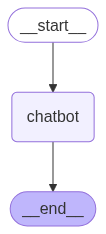

In [14]:
graph_builder.compile()

In [15]:
graph = graph_builder.compile()

In [19]:
from langchain_groq import ChatGroq
from typing import  Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START, END

# Replace 'Gemaa2-9b-it' with a valid model name, for example 'llama3-8b-8192'
llm = ChatGroq(groq_api_key=groq_api_key,model_name ="llama3-8b-8192")

class State(TypedDict):
  messages: Annotated[list, add_messages]
graph_builder = StateGraph(State)

def chatboat(state:State):
  return{"messages":llm.invoke(state['messages'])}

graph_builder.add_node('chatbot',chatboat)
graph_builder.add_edge(START,'chatbot')
graph_builder.add_edge('chatbot',END)

graph = graph_builder.compile()

while True:
  user_input = input("user:")
  if user_input.lower() in ['quit','q']:
    print('Good bye , thank you using lang graph framework')
    break
  for event in graph.stream({'messages':('user', user_input)}):
    print(event.values())
    for value in event.values():
      # Ensure value['messages'] is a BaseMessage object before accessing .content
      if hasattr(value['messages'], 'content'):
          print('Assistant:',value['messages'].content)
      else:
          print('Assistant:', value['messages']) # Print the message as is if it doesn't have a content attribute

user:ai explain 
dict_values([{'messages': AIMessage(content='You want me to explain something about AI (Artificial Intelligence). What would you like me to explain?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 13, 'total_tokens': 35, 'completion_time': 0.020155267, 'prompt_time': 0.002377919, 'queue_time': 0.127303068, 'total_time': 0.022533186}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_f974fb141b', 'finish_reason': 'stop', 'logprobs': None}, id='run--60283d86-91c5-464c-9b2f-5f63c5089a30-0', usage_metadata={'input_tokens': 13, 'output_tokens': 22, 'total_tokens': 35})}])
Assistant: You want me to explain something about AI (Artificial Intelligence). What would you like me to explain?
user:yes
dict_values([{'messages': AIMessage(content='A simple but effective response!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 11, 'total_tokens': 18, 'completion_time': 0.0